## pix2pix(U-Net + GAN) experiments

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.WARN)

### Model definitions

In [2]:
from utils import load_dataset, save_p2p_models
from utils import plot_p2p_models, plot_p2p_losses
from utils import three_image_generators
from models import g_unet, discriminator, pix2pix
from train import train
from keras.optimizers import RMSprop
from keras.optimizers import Adam

Using TensorFlow backend.


### Dataset loading + preprocessing

In [3]:
W = 256
H = 256
dataset_path = '../data/dust'
trend_num = 2
side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, N_train, N_val = load_dataset(
    dataset_path, trend_num=trend_num, mode=3, W=W, H=H)

Validation dataset: 100%|██████████| 316/316 [00:01<00:00, 268.46it/s]


In [4]:
batch_size = 32
train_gen, val_gen = three_image_generators(
    side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, batch_size=batch_size, vf=True, sf=False)

### Training

In [5]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta5'

In [6]:
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
p2p = pix2pix(f_gen, d, eta=5, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
#plot_p2p_models(models_path, trend_num, nn_name, f_gen, d, p2p)

Epoch 1/1
188/188 [==============================] - 110s - loss: 0.0927   
Epoch 1/1
188/188 [==============================] - 146s - loss: 5.5342   

Dir already exist
Models saved successfully
Dir already exist


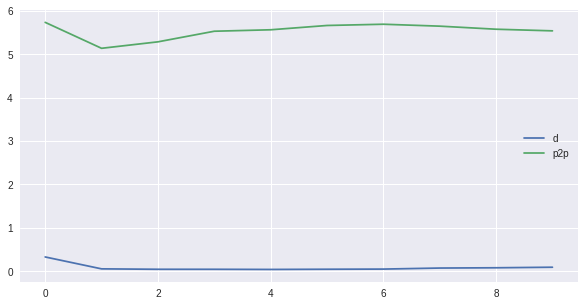

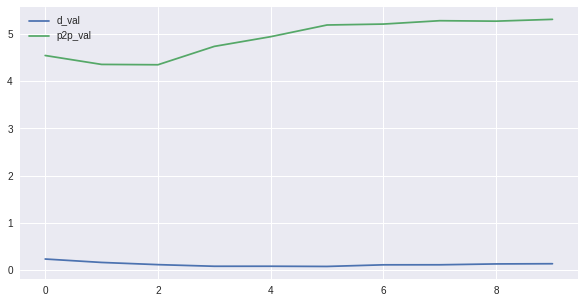

In [7]:
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 109s - loss: 0.2175   
Epoch 1/1
188/188 [==============================] - 146s - loss: 6.9424   

Dir already exist
Models saved successfully
Dir already exist


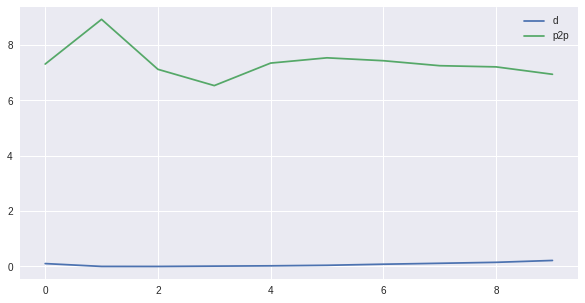

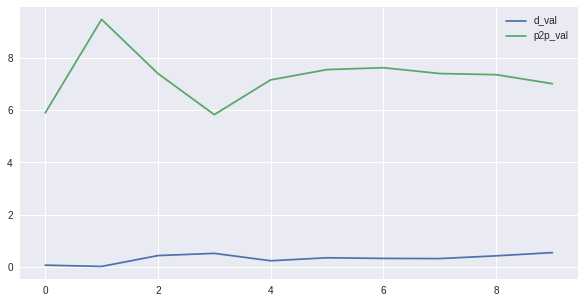

In [8]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta5_rms'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=RMSprop(lr=1e-4, decay=0.01))
p2p = pix2pix(f_gen, d, eta=5, opt=RMSprop(lr=1e-4, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 109s - loss: 0.1998   
Epoch 1/1
188/188 [==============================] - 147s - loss: 3.9963   

Dir already exist
Models saved successfully
Dir already exist


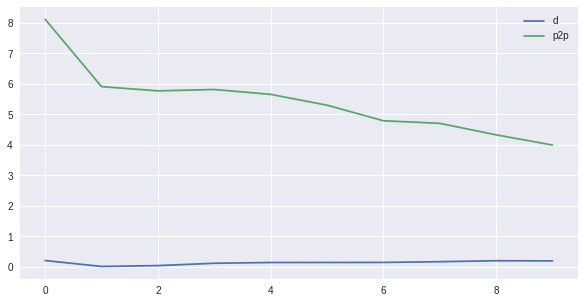

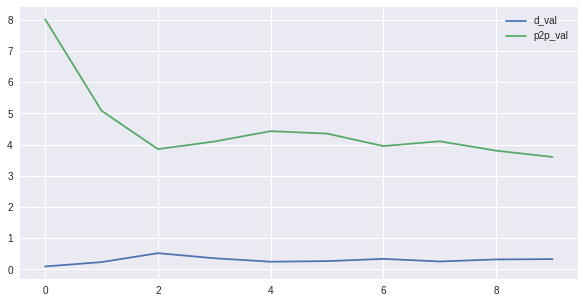

In [9]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta10'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
p2p = pix2pix(f_gen, d, eta=10, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 111s - loss: 0.4322   
Epoch 1/1
188/188 [==============================] - 146s - loss: 5.7394   

Dir already exist
Models saved successfully
Dir already exist


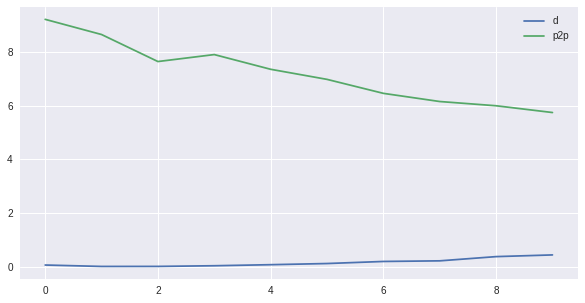

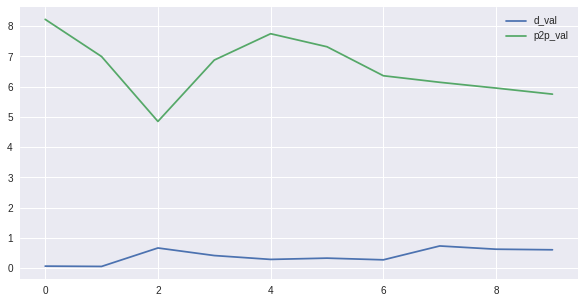

In [10]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta10_rms'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=RMSprop(lr=1e-4, decay=0.01))
p2p = pix2pix(f_gen, d, eta=10, opt=RMSprop(lr=1e-4, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 113s - loss: 0.1690   
Epoch 1/1
188/188 [==============================] - 147s - loss: 8.5412   

Dir already exist
Models saved successfully
Dir already exist


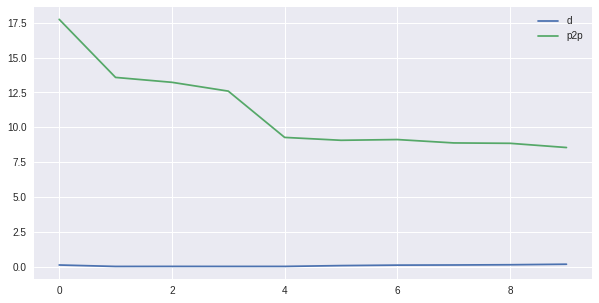

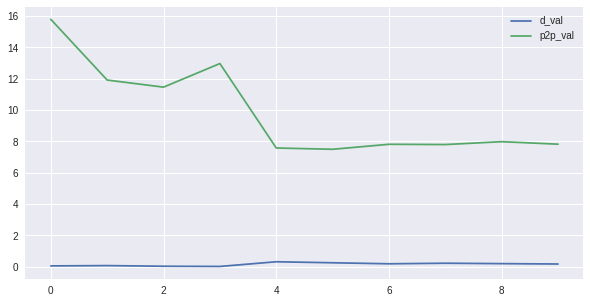

In [11]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta20'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
p2p = pix2pix(f_gen, d, eta=20, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 130s - loss: 0.2851   
Epoch 1/1
188/188 [==============================] - 146s - loss: 10.1272   

Dir already exist
Models saved successfully
Dir already exist


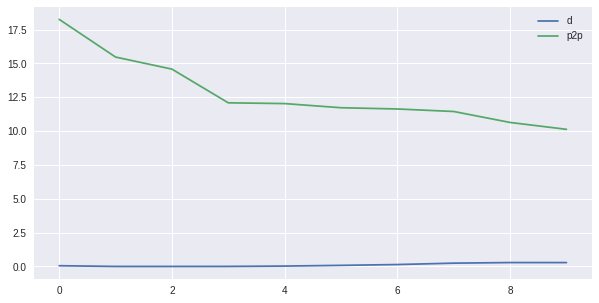

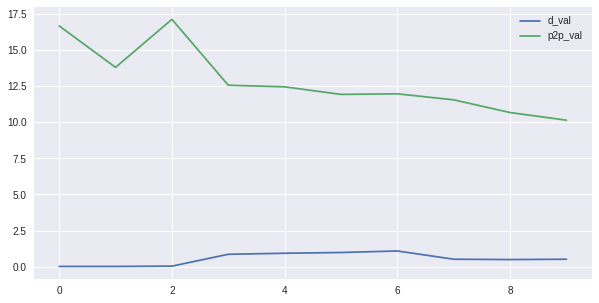

In [12]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta20_rms'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=RMSprop(lr=1e-4, decay=0.01))
p2p = pix2pix(f_gen, d, eta=20, opt=RMSprop(lr=1e-4, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 128s - loss: 0.1124   
Epoch 1/1
188/188 [==============================] - 147s - loss: 15.6343   

Dir already exist
Models saved successfully
Dir already exist


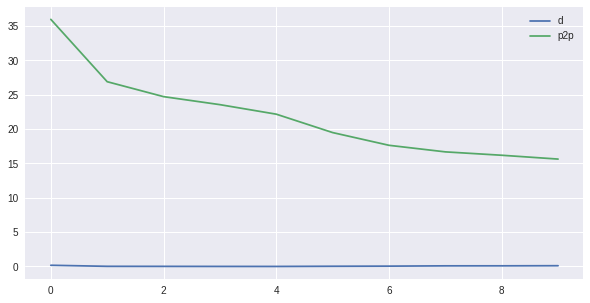

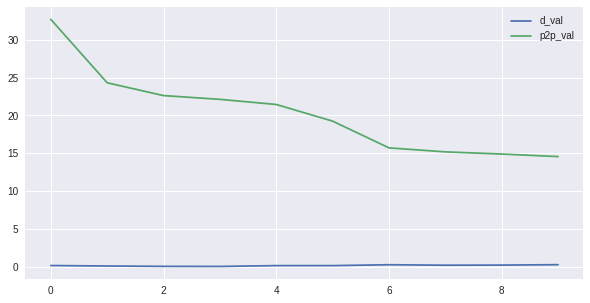

In [13]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta50'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
p2p = pix2pix(f_gen, d, eta=50, opt=Adam(lr=1e-4, beta_1=0.2, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)

Epoch 1/1
188/188 [==============================] - 146s - loss: 0.0657   
Epoch 1/1
188/188 [==============================] - 146s - loss: 16.8193   

Dir already exist
Models saved successfully
Dir already exist


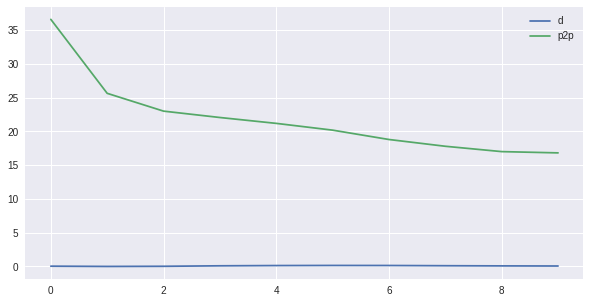

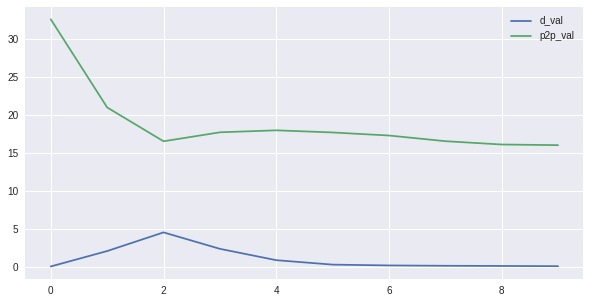

In [14]:
models_path = 'trained_models/dust'
trend_num = 2
nn_name = 'nf32_eta50_rms'
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf, opt=RMSprop(lr=1e-4, decay=0.01))
p2p = pix2pix(f_gen, d, eta=50, opt=RMSprop(lr=1e-4, decay=0.01))
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=10,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)